In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from tabulate import tabulate
from plotnine import *
import os
import sys

!git clone --recurse-submodules https://github.com/wkzawadzka/the-cleora.git
%cd the-cleora
sys.path.append('src')
sys.path.append('src/utils')

Cloning into 'the-cleora'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 17 (delta 3), reused 13 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (17/17), done.
Resolving deltas: 100% (3/3), done.
Submodule 'cleora' (https://github.com/BaseModelAI/cleora) registered for path 'cleora'
Cloning into '/content/the-cleora/the-cleora/the-cleora/cleora'...
remote: Enumerating objects: 614, done.        
remote: Counting objects: 100% (27/27), done.        
remote: Compressing objects: 100% (23/23), done.        
remote: Total 614 (delta 11), reused 13 (delta 4), pack-reused 587 (from 1)        
Receiving objects: 100% (614/614), 4.92 MiB | 23.55 MiB/s, done.
Resolving deltas: 100% (364/364), done.
Submodule path 'cleora': checked out 'bfe821199c6c22a038c6343f33af0c8a14288e0f'
/content/the-cleora/the-cleora/the-cleora


We use [GitHub Social Network](https://snap.stanford.edu/data/github-social.html?fbclid=IwY2xjawGRoeJleHRuA2FlbQIxMAABHWOiiC6yC_JpNQb6kN7xUU0PfRPxrfkYum1H1eSsnzNwreAgG8VDYz-KIg_aem_EFRO_vJ6_82zymw9YQZJng) [1] dataset: <br>

In [ ]:
!wget https://snap.stanford.edu/data/git_web_ml.zip -O git_web_ml.zip
!unzip -j git_web_ml.zip -d data/

--2024-11-01 17:31:03--  https://snap.stanford.edu/data/git_web_ml.zip
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2396031 (2.3M) [application/zip]
Saving to: ‘git_web_ml.zip’

git_web_ml.zip      100%[===================>]   2.28M  5.92MB/s    in 0.4s    

2024-11-01 17:31:04 (5.92 MB/s) - ‘git_web_ml.zip’ saved [2396031/2396031]

Archive:  git_web_ml.zip
  inflating: data/musae_git_edges.csv  
  inflating: data/musae_git_features.json  
  inflating: data/musae_git_target.csv  
  inflating: data/citing.txt         
  inflating: data/README.txt         


## **Reading data**

In [ ]:
with open("data/musae_git_features.json") as json_data:
    features = json.load(json_data) # node featues
edges = pd.read_csv("data/musae_git_edges.csv") # edges
target = pd.read_csv("data/musae_git_target.csv") # node binary targets

ids_0 = target['id'][target['ml_target'] == 0].tolist()
ids_1 = target['id'][target['ml_target'] == 1].tolist()

In [ ]:
print("Edges:\n" + edges.head().to_markdown())
print("\nNodes targets:\n" + target.head().to_markdown())

Edges:
|    |   id_1 |   id_2 |
|---:|-------:|-------:|
|  0 |      0 |  23977 |
|  1 |      1 |  34526 |
|  2 |      1 |   2370 |
|  3 |      1 |  14683 |
|  4 |      1 |  29982 |

Nodes targets:
|    |   id | name         |   ml_target |
|---:|-----:|:-------------|------------:|
|  0 |    0 | Eiryyy       |           0 |
|  1 |    1 | shawflying   |           0 |
|  2 |    2 | JpMCarrilho  |           1 |
|  3 |    3 | SuhwanCha    |           0 |
|  4 |    4 | sunilangadi2 |           1 |


In [ ]:
print(edges.shape) # edges info
print(len(features.keys())) # feature vector for each of the nodes
print(target.shape) # nodes ids & classes

(289003, 2)
37700
(37700, 3)


## **Exploratory data analysis**

In [ ]:
from plots import plot_class_distribution
import networkx as nx

G = nx.from_pandas_edgelist(edges, 'id_1', 'id_2')
num_nodes = nx.number_of_nodes(G)
num_edges = nx.number_of_edges(G)
avg_degree = sum(dict(G.degree()).values()) / num_nodes
density = nx.density(G)
stats = {
    "Number of Nodes": num_nodes,
    "Number of Edges": num_edges,
    "Average Degree": avg_degree,
    "Density": density
}
print(stats)

{'Number of Nodes': 37700, 'Number of Edges': 289003, 'Average Degree': 15.331724137931035, 'Density': 0.0004066878203117068}


### 1. Targets

   Class  Count     Label
0      0  27961  Web devs
1      1   9739    ML Eng


/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:610: PlotnineWarning: Saving 5 x 4 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:611: PlotnineWarning: Filename: data/plots/class_distribution.png


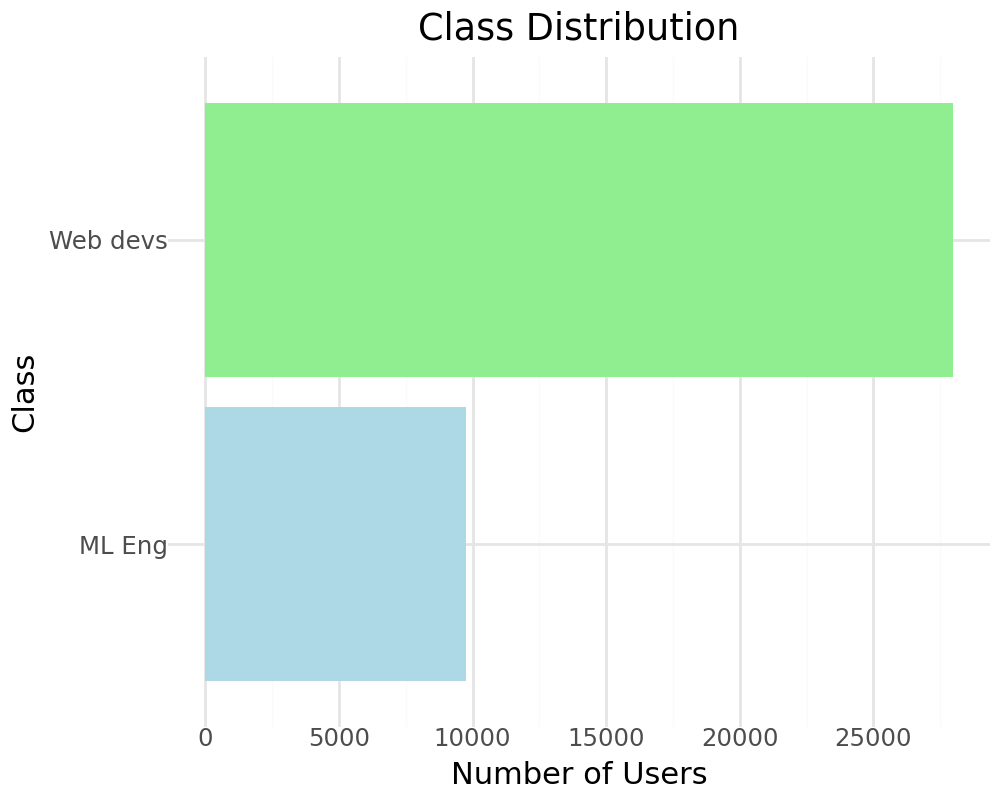

In [ ]:
plot_class_distribution(target)

### 2. Features

In [ ]:
features_lengths = [len(value) for value in features.values()]
subset_web = {key:val for key, val in features.items() if int(key) in ids_0}
features_lengths_web = [len(value) for value in subset_web.values()]
subset_ml = {key:val for key, val in features.items() if int(key) in ids_1}
features_lengths_ml = [len(value) for value in subset_ml.values()]

# overall
print(f"On average, there is {np.mean(features_lengths):.2f} features per node", end="")
print(f" (min: {min(features_lengths)} - max: {max(features_lengths)})")
# web
print(f"For web developers: on average, there is {np.mean(features_lengths_web):.2f} features per node", end="")
print(f" (min: {min(features_lengths_web)} - max: {max(features_lengths_web)})")
# ml
print(f"For ML Engineers: on average, there is {np.mean(features_lengths_ml):.2f} features per node", end="")
print(f" (min: {min(features_lengths_ml)} - max: {max(features_lengths_ml)})")
# total
print(f"\nIn total there is {sum(features_lengths)} features")

On average, there is 18.31 features per node (min: 8 - max: 42)
For web developers: on average, there is 18.13 features per node (min: 8 - max: 42)
For ML Engineers: on average, there is 18.82 features per node (min: 9 - max: 38)

In total there is 690374 features


### 3. Edges

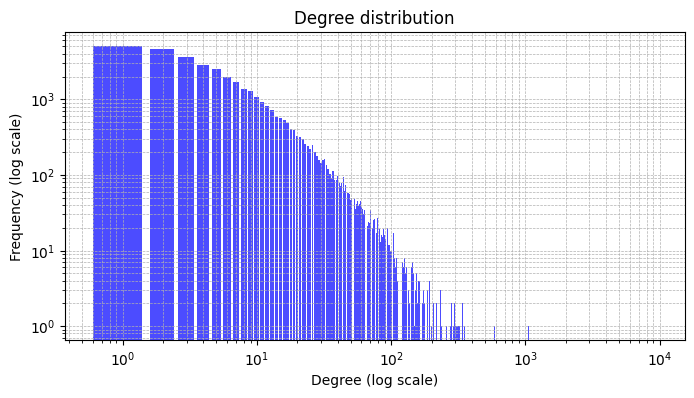

In [ ]:
degree_sequence = [G.degree(n) for n in G.nodes()] # degree for each node
degree_count = pd.Series(degree_sequence).value_counts().sort_index() # degree & count for it

# "Normally the logarithm of both x and y axes is taken when plotting the degree distribution,
# this helps seeing if a networkx is scale-free (a network with a degree distribution following a power law)"

plt.figure(figsize=(8, 4))
plt.bar(degree_count.index, degree_count.values, color='blue', alpha=0.7)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Degree (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Degree distribution')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

## **Sources**

[1] B. Rozemberczki, C. Allen and R. Sarkar. Multi-scale Attributed Node Embedding. 2019.